# Getting the system ready and loading the data

In [1]:
#!pip install skimpy

In [2]:
#!pip install category_encoders

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split,cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import skimpy as sk
from category_encoders import OneHotEncoder
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
loan_df = pd.read_csv("../data/raw_data.csv")
loan_val = pd.read_csv("../data/validation.csv")
loan_val.head()
#loan_df.head()
loan_val.shape

(367, 12)

# Exploratory Data Analysis

In [5]:
print(f'The dataframe has {loan_df.shape[0]} rows and {loan_df.shape[1]} columns.')

The dataframe has 614 rows and 13 columns.


In [6]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


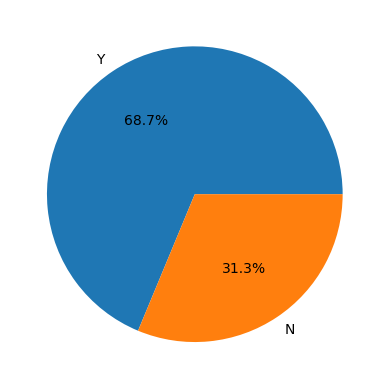

In [7]:
temp = loan_df['Loan_Status'].value_counts() 
plt.pie(temp.values, 
        labels=temp.index, 
        autopct='%1.1f%%') 
plt.show() 

In [8]:
sk.skim(loan_df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 614    │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25    ┃ p50   ┃ p75   ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ ApplicantIncome        │   0 │      0 │   5400 │   6100 │  150 │   2900 │  3800 │  5800 │  81000 │    ▇    │  │
│ │ CoapplicantIncome      │   0 │      0 │   1600 │   2900 │    0 │      0 │  1200 │  2300 │  42000 │    ▇    │  │
│ │ LoanAmount             │  22 │   3.58 │    150 │     86 │    9 │    100 │   130 │   170 │    700 │   ▇▇▁   │  │
│ │ Loan_Amount_Term       │  14 │   2.28 │    340 │     65 │   12 │    360 │   360 │   360 │    480 │    ▁ ▇  │  │
│ │ Credit_History         │  50 │   8.14 │   0.84 │   0.36 │    0 │      1 │     1 │     1 │      1 │ ▁    ▇  │  │
│ └────────────────────────┴─────┴────────┴────────┴────────┴──────┴────────┴───────┴───────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Loan_ID                      │      0 │          0 │                           1 │                     614 │  │
│ │ Gender                       │     13 │       2.12 │                        0.98 │                     601 │  │
│ │ Married                      │      3 │       0.49 │                           1 │                     611 │  │
│ │ Dependents                   │     15 │       2.44 │                        0.98 │                     599 │  │
│ │ Education                    │      0 │          0 │                         1.2 │                     748 │  │
│ │ Self_Employed                │     32 │       5.21 │                        0.95 │                     582 │  │
│ │ Property_Area                │      0 │          0 │                           1 │                     614 │  │
│ │ Loan_Status                  │      0 │          0 │                           1 │                     614 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

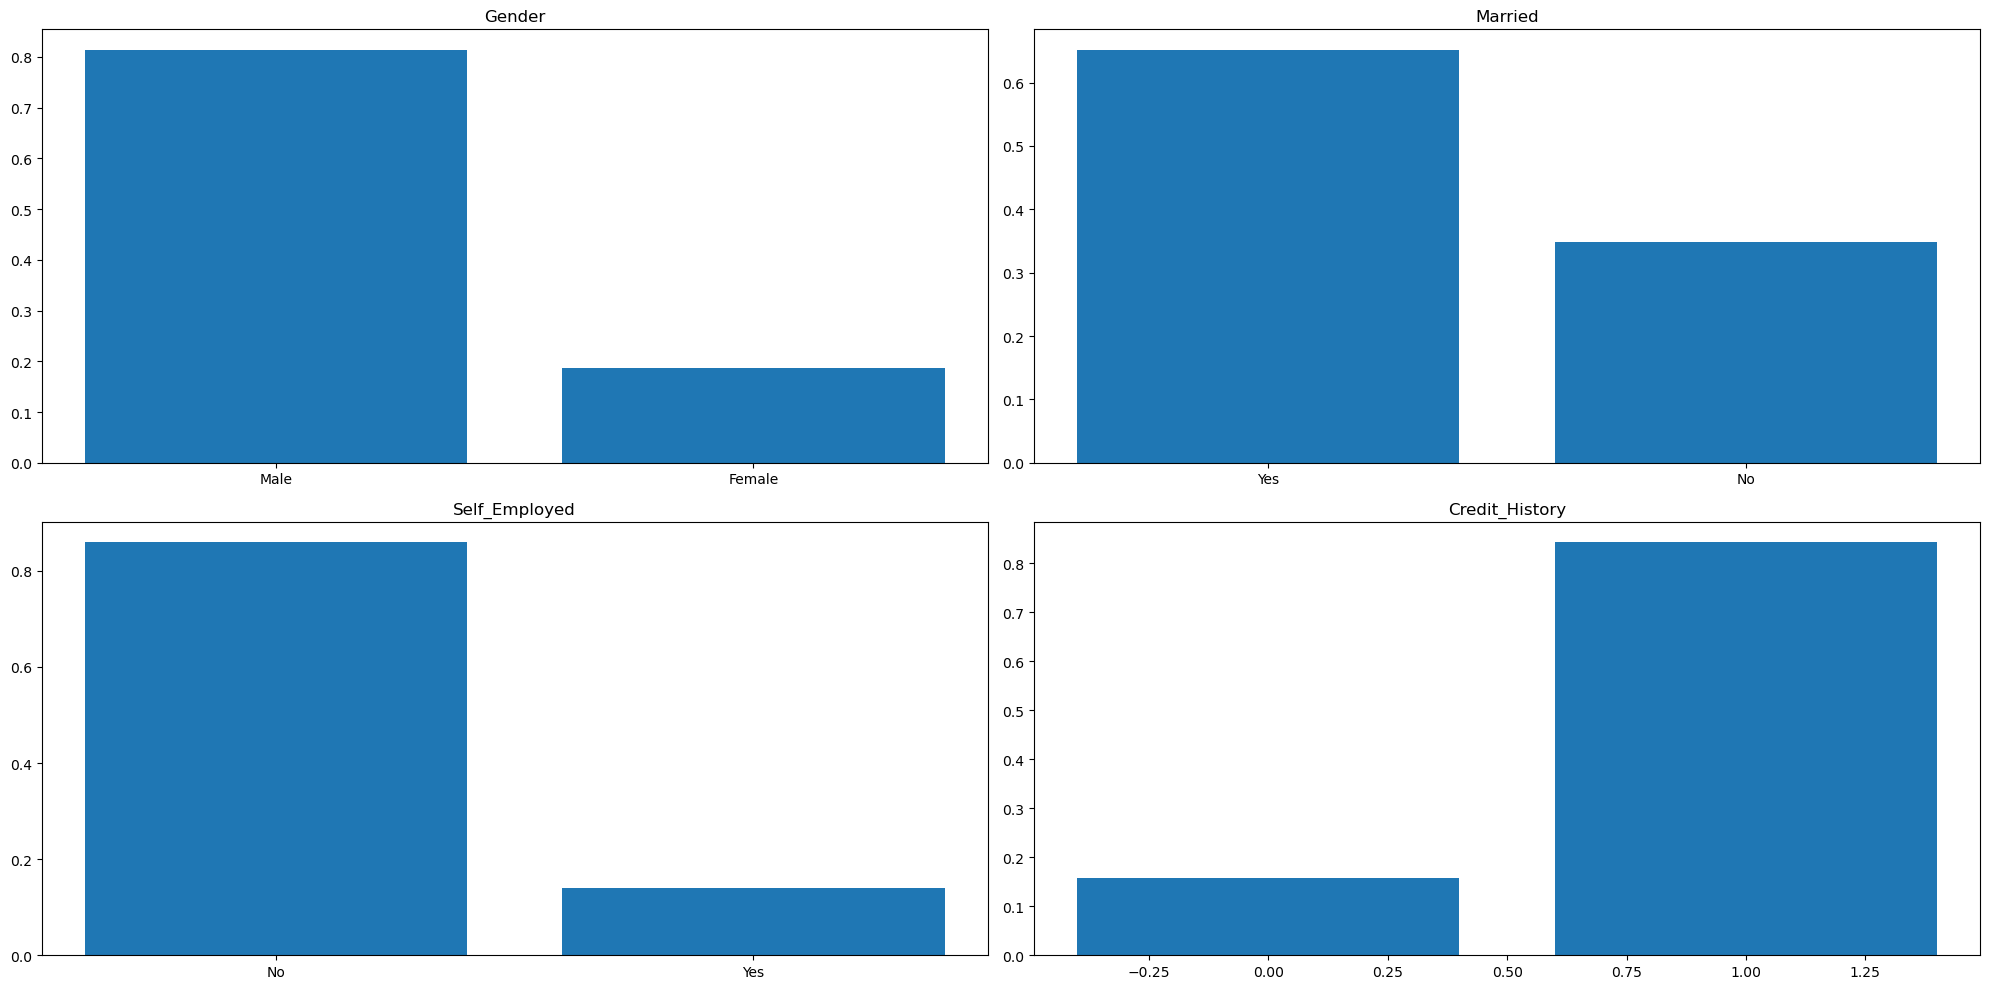

In [9]:


# Create a figure
fig, axs = plt.subplots(2, 2, figsize=(20, 10))

# Subplot 1
axs[0, 0].bar(loan_df['Gender'].value_counts(normalize=True).index, loan_df['Gender'].value_counts(normalize=True).values)
axs[0, 0].set_title('Gender')

# Subplot 2
axs[0, 1].bar(loan_df['Married'].value_counts(normalize=True).index, loan_df['Married'].value_counts(normalize=True).values)
axs[0, 1].set_title('Married')

# Subplot 3
axs[1, 0].bar(loan_df['Self_Employed'].value_counts(normalize=True).index, loan_df['Self_Employed'].value_counts(normalize=True).values)
axs[1, 0].set_title('Self_Employed')

# Subplot 4
axs[1, 1].bar(loan_df['Credit_History'].value_counts(normalize=True).index, loan_df['Credit_History'].value_counts(normalize=True).values)
axs[1, 1].set_title('Credit_History')

plt.tight_layout()
plt.show()

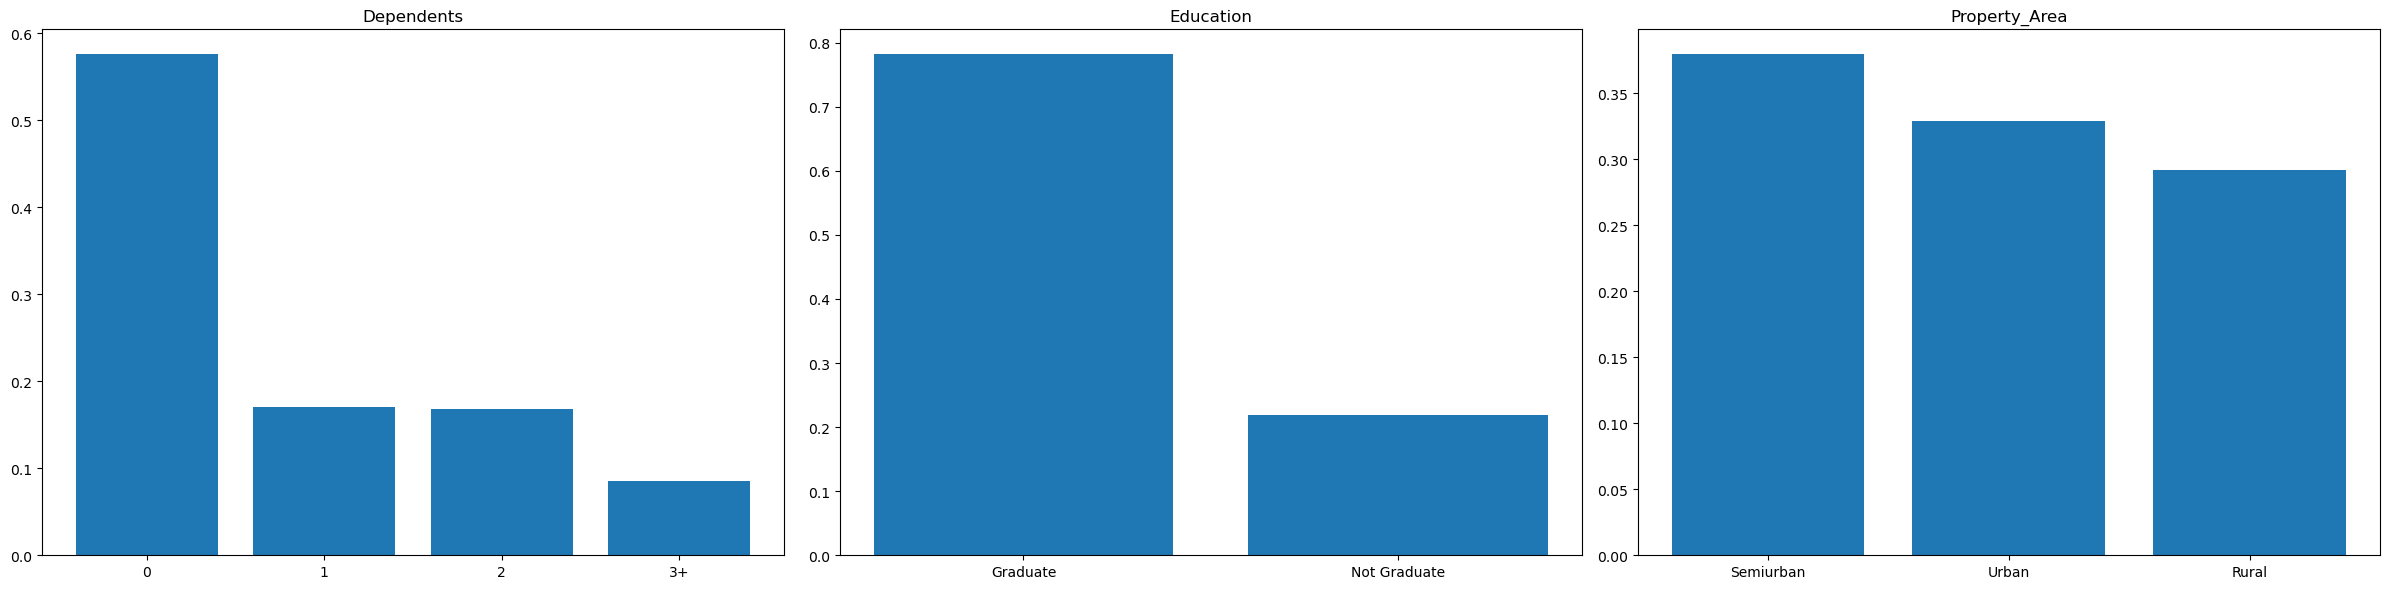

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Subplot 1
axs[0].bar(loan_df['Dependents'].value_counts(normalize=True).index, loan_df['Dependents'].value_counts(normalize=True).values)
axs[0].set_title('Dependents')

# Subplot 2
axs[1].bar(loan_df['Education'].value_counts(normalize=True).index, loan_df['Education'].value_counts(normalize=True).values)
axs[1].set_title('Education')

# Subplot 3
axs[2].bar(loan_df['Property_Area'].value_counts(normalize=True).index, loan_df['Property_Area'].value_counts(normalize=True).values)
axs[2].set_title('Property_Area')

plt.tight_layout()
plt.show()

# Data Preparation

In [11]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
loan_df['LoanAmount'].fillna(loan_df['LoanAmount'].mean(), inplace=True)
loan_df['Credit_History'].fillna(loan_df['Credit_History'].mode()[0], inplace=True)
loan_df['Married'].fillna(loan_df['Married'].mode()[0], inplace=True)
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)
loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0], inplace=True)
loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0], inplace=True)
loan_df['Loan_Amount_Term'].fillna(loan_df['Loan_Amount_Term'].mode()[0], inplace=True)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
# Dropping the loan id column
loan_df = loan_df.drop(columns=['Loan_ID'], inplace=False)
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [14]:
loan_df.isnull().sum()
#output is zero columns with missing values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
loan_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [16]:
loan_encode = OneHotEncoder(use_cat_names = True, cols= ["Education", "Married", "Gender", "Self_Employed", "Property_Area", "Loan_Status", "Dependents"])

encoded = loan_encode.fit_transform(loan_df)
encoded.head()
#use replace

,Gender_Male,Gender_Female,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,...,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban,Loan_Status_Y,Loan_Status_N
0,1,0,1,0,1,0,0,0,1,0,...,5849,0.0,146.412162,360.0,1.0,1,0,0,1,0
1,1,0,0,1,0,1,0,0,1,0,...,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1
2,1,0,0,1,1,0,0,0,1,0,...,3000,0.0,66.000000,360.0,1.0,1,0,0,1,0
3,1,0,0,1,1,0,0,0,0,1,...,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,0
4,1,0,1,0,1,0,0,0,1,0,...,6000,0.0,141.000000,360.0,1.0,1,0,0,1,0


In [17]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [18]:
loan_df.replace({"Married": {"Yes":1, "No":0}, "Gender":{"Male":1, "Female": 0}, "Dependents":{"3+":3}, "Education":{"Graduate":1,"Not Graduate":0}, "Property_Area": {"Urban":2, "Semiurban":1, "Rural":0}, "Loan_Status": {"Y":1, "N":0}, "Self_Employed": {"Yes":1, "No":0}}, inplace=True)

In [19]:
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


<Axes: >

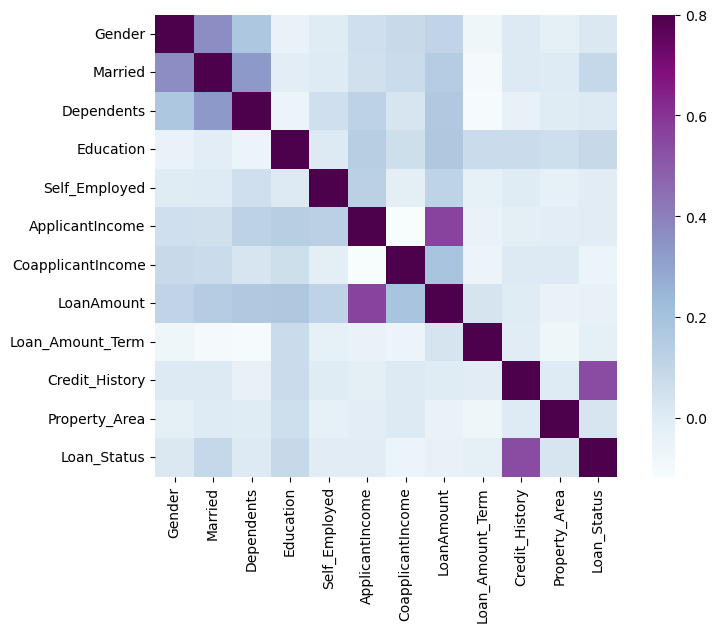

In [20]:
matrix = loan_df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")

# Model Building Part 1

In [21]:
X = loan_df.drop(columns = ["Loan_Status"], axis =1)
Y = loan_df["Loan_Status"]

In [22]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          3          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

# Train test split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (491, 11) (123, 11)


In [24]:
classifier = svm.SVC(kernel="linear")

In [25]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [26]:
loan_predic = classifier.predict(X_train)
Data_acu = accuracy_score(loan_predic, Y_train)

In [28]:
print("Accuracy: ",Data_acu)

Accuracy:  0.8085539714867617


### Feature Engineering

C:\Users\Vuyo\AppData\Local\Temp\ipykernel_50736\1828407867.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df['Total_Income'])
c:\Users\Vuyo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Total_Income', ylabel='Density'>

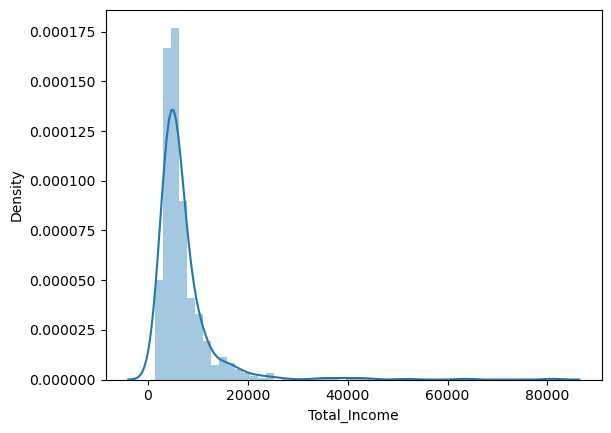

In [29]:
loan_df['Total_Income'] = loan_df['ApplicantIncome']+ loan_df['CoapplicantIncome']
loan_val['Total_Income']= loan_val['ApplicantIncome']+ loan_val['CoapplicantIncome']
sns.distplot(loan_df['Total_Income'])


C:\Users\Vuyo\AppData\Local\Temp\ipykernel_50736\1896899129.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_df['Total_Income_log'])
c:\Users\Vuyo\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


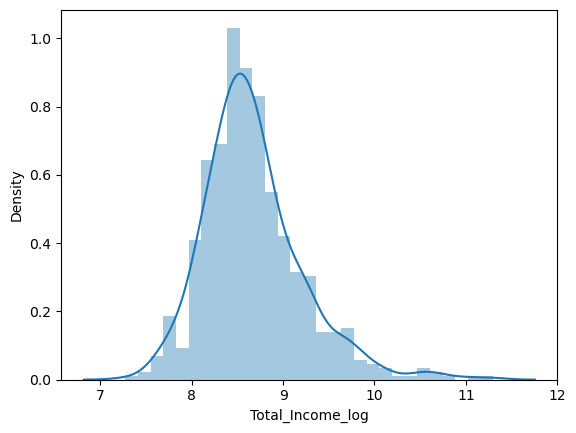

In [30]:
loan_df['Total_Income_log'] = np.log(loan_df['Total_Income'])
sns.distplot(loan_df['Total_Income_log'])
loan_val['Total_Income_log'] = np.log(loan_val['Total_Income'])

# Model building part 2

In [31]:
X = loan_df.drop(columns = ["Loan_Status"], axis =1)
Y = loan_df["Loan_Status"]

In [32]:
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
model = LogisticRegression(random_state=1 ,max_iter=1000)


pred_test = cross_val_predict(model, X, Y, cv=kf)

accuracy = accuracy_score(Y, pred_test)
print('Accuracy:', accuracy)


pred_test = ['Y' if pred == 1 else 'N' for pred in pred_test]


Accuracy: 0.8094462540716613
